In [24]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [25]:
# load the dataset
data = pd.read_csv("mushroom_data.csv")
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'s','w','w','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'s','w','w','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'s','w','w','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'s','w','w','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'s','w','w','w','o','e','n','a','g','e'


In [26]:
# create an instance of Label Encoder, One Hot Encode, Standard Scaler
le = LabelEncoder()
one_hot = OneHotEncoder()
ss = StandardScaler()

In [27]:
# split data into independent features and target variable
X = data.drop(['class'], axis=1)
y = data['class']

In [28]:
for i in X.columns:
    X[i] = le.fit_transform(X[i])

In [29]:
y = le.fit_transform(y)

In [30]:
X.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [31]:
fs = SelectKBest(score_func=chi2, k ='all')

In [32]:
# fitting data
fs.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x0000011844B98F40>)

Feature 0: 17.508364
Feature 1: 214.068544
Feature 2: 11.511382
Feature 3: 1194.277352
Feature 4: 75.910163
Feature 5: 3.505447
Feature 6: 826.795274
Feature 7: 1636.606833
Feature 8: 5957.764469
Feature 9: 36.594105
Feature 10: 1358.358638
Feature 11: 222.982400
Feature 12: 206.648180
Feature 13: 119.792216
Feature 14: 109.789410
Feature 15: 5.126826
Feature 16: 25.646335
Feature 17: 1950.610146
Feature 18: 379.132729
Feature 19: 311.766736
Feature 20: 751.309489


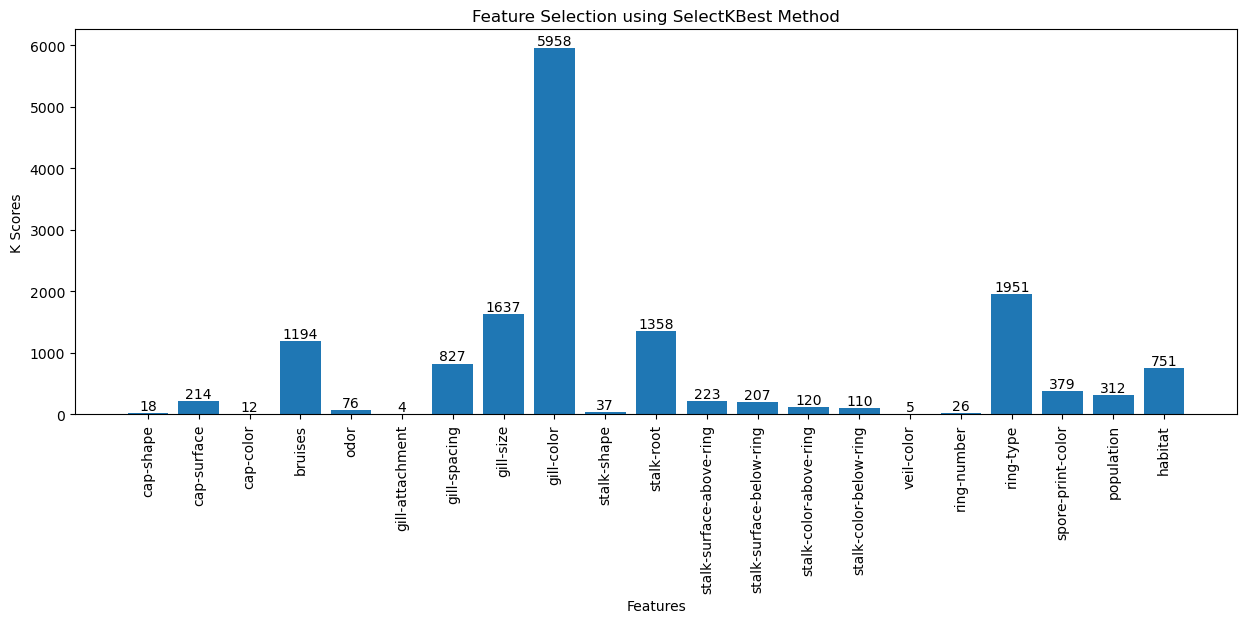

In [33]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1,1),(0,0))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_.round(0))
plt.xlabel('Features')
plt.ylabel('K Scores')
plt.xticks(ticks=range(0,21), labels=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat'], rotation=90)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title('Feature Selection using SelectKBest Method')
plt.show()

In [34]:
new_data = data[['class','bruises%3F', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'ring-type', 'spore-print-color']]
print(new_data.shape)
new_data.head()

(8124, 8)


,class,bruises%3F,gill-spacing,gill-size,gill-color,stalk-root,ring-type,spore-print-color
0,'p','t','c','n','k','e','p','k'
1,'e','t','c','b','k','c','p','n'
2,'e','t','c','b','n','c','p','n'
3,'p','t','c','n','n','e','p','k'
4,'e','f','w','b','k','e','e','n'


In [35]:
new_data.to_csv("final_data.csv", index=False, header=True)

In [36]:
# split data into independent features and target variable
X = new_data.drop(['class'], axis=1)
y = new_data['class']

In [37]:
# categorical features
cat_features = X.select_dtypes(include="object").columns

In [38]:
cat_features

Index(['bruises%3F', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'ring-type', 'spore-print-color'],
      dtype='object')

In [39]:
# create pipelines for categorical data
cat_pipeline = Pipeline(
    steps=[
        ("one hot", OneHotEncoder()),
        ("Scaler", StandardScaler(with_mean=False))
    ]
)

In [40]:
# creating preprocessor object
preprocessor = ColumnTransformer([
    ("cat_pipeline", cat_pipeline, cat_features)
])

In [41]:
# applying preprocesing object to features
X = preprocessor.fit_transform(X)

In [42]:
# Label encode target variable
y = le.fit_transform(y)

In [43]:
# divide the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=222)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (6093, 36)
y_train: (6093,)
X_test: (2031, 36)
y_test: (2031,)


In [46]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    confusionmatrix = confusion_matrix(true, predicted)    
    classificationreport = classification_report(true, predicted)
    return accuracy, confusionmatrix, classificationreport

In [49]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Support Vector Classifier': SVC(),
    # 'Gaussian Naive Bayes': GaussianNB(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_accuracy, train_confusionmatrix, train_classificationreport = evaluate_model(y_train,y_train_pred)

    test_accuracy, test_confusionmatrix, test_classificationreport = evaluate_model(y_test, y_test_pred)
        
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("**Accuracy Score:", train_accuracy)
    print("**Confusion Matrix: \n", train_confusionmatrix)
    print("**Classification Report: \n", train_classificationreport)

    print('-'*35)
    
    print('Model performance for Test set')
    print("**Accuracy Score:", test_accuracy)
    print("**Confusion Matrix: \n", test_confusionmatrix)
    print("**Classification Report: \n", test_classificationreport)
    
    accuracy_list.append(test_accuracy)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
**Accuracy Score: 0.9806335138683735
**Confusion Matrix: 
 [[3079   76]
 [  42 2896]]
**Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3155
           1       0.97      0.99      0.98      2938

    accuracy                           0.98      6093
   macro avg       0.98      0.98      0.98      6093
weighted avg       0.98      0.98      0.98      6093

-----------------------------------
Model performance for Test set
**Accuracy Score: 0.9812900049236829
**Confusion Matrix: 
 [[1033   20]
 [  18  960]]
**Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1053
           1       0.98      0.98      0.98       978

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

In [50]:
# Results
pd.DataFrame(list(zip(model_list, accuracy_list)),columns=['Model Name','Accuracy Score']).sort_values(
    by=["Accuracy Score"],ascending=False)

,Model Name,Accuracy Score
1,Decision Tree Classifier,1.00000
2,Random Forest Classifier,1.00000
3,Gradient Boosting Classifier,1.00000
5,Support Vector Classifier,1.00000
6,K-Neighbors Classifier,1.00000
0,Logistic Regression,0.98129
4,AdaBoost Classifier,0.98129


In [51]:
#we will use knn

In [53]:
model_knn=KNeighborsClassifier()

In [54]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
model_knn.score(X_test,y_test)

1.0

In [58]:

# make predictions on test data
predictions = model_knn.predict(X_test)

In [59]:
# performance metrics
print("Accuracy Score:", accuracy_score(y_test, predictions).round(4)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy Score: 100.0
Confusion Matrix:
 [[1053    0]
 [   0  978]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       978

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [60]:
# Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions})
pred_df

,Actual Value,Predicted Value
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2026,1,1
2027,1,1
2028,0,0
2029,0,0
